In [1]:
import os
import pandas as pd
from pyspark.ml.feature import StringIndexer, OneHotEncoder
import plotly.express as px
import json

os.chdir('../')


In [2]:

from Utils.SparkSessionManager import SparkSessionManager
from Service.DataReader import DataReader
from Service.VMAnalyzer import VMAnalyzer

In [3]:
spark = SparkSessionManager.create_session()
dt_reader = DataReader(spark)
with open('settings.json', 'r') as file:
    data = json.load(file)

local_settings = data['Local']
filepath = local_settings['filepath']
input_file = local_settings['input']

csv_file, vmSchema = dt_reader.read_data(filepath, input_file)
dt_analyzer = VMAnalyzer(spark, csv_file, vmSchema)


In [4]:
dataFrame = dt_analyzer.get_df()
processed_df = dt_analyzer.pre_processing_pipeline()

+----------------+----------+
|   Attack Vector|Base Score|
+----------------+----------+
|ADJACENT_NETWORK|       8.8|
|           LOCAL|       7.8|
|         NETWORK|       7.5|
|        PHYSICAL|       6.8|
+----------------+----------+



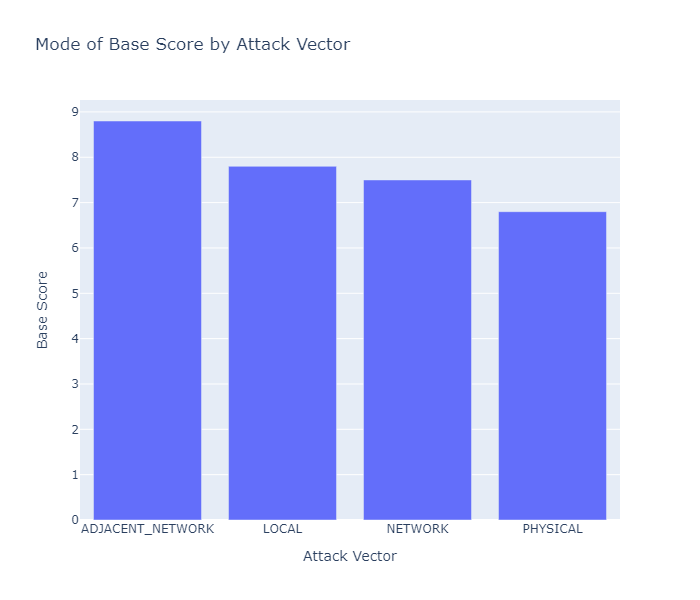

In [5]:

dt_analyzer.find_mode_category(dataFrame, "attackVector", "baseScore", "Attack Vector", "Base Score", 700, 600, "png")




In [ ]:
dt_analyzer.find_mode_category(dataFrame, "attackVector", "impactScore", "Attack Vector", "Impact Score", 700, 600, "png")

+----------------+------------+
|   Attack Vector|Impact Score|
+----------------+------------+
|ADJACENT_NETWORK|         5.9|
|           LOCAL|         5.9|
|         NETWORK|         5.9|
|        PHYSICAL|         5.9|
+----------------+------------+



In [ ]:
dt_analyzer.find_mean_category(dataFrame, "attackVector", "baseScore", "Attack Vector", "Base Score", 700, 600, "png")

+----------------+-----------------+
|   Attack Vector|       Base Score|
+----------------+-----------------+
|ADJACENT_NETWORK|7.485000109672546|
|           LOCAL|6.336111194557613|
|         NETWORK|7.380952449071975|
|        PHYSICAL|5.559375017881393|
+----------------+-----------------+



In [ ]:
dt_analyzer.show_correlation_scatter_plot(processed_df, "baseScore", "exploitabilityScore", "Base Score", "Exploitability Score" , 700, 600, "", "png")

In [ ]:
dt_analyzer.show_correlation_stacked_bar_chart(processed_df, "attackVector", "baseSeverity", "Attack Vector", "Base Severity" , 700, 900, "", "png")

+----------------+------------+-----+
|    attackVector|baseSeverity|count|
+----------------+------------+-----+
|ADJACENT_NETWORK|    CRITICAL|    1|
|         NETWORK|         LOW|   23|
|           LOCAL|        HIGH|  509|
|ADJACENT_NETWORK|        HIGH|   41|
|        PHYSICAL|         LOW|    9|
|           LOCAL|         LOW|   50|
|        PHYSICAL|      MEDIUM|   72|
|         NETWORK|        HIGH| 1079|
|         NETWORK|      MEDIUM| 1076|
|ADJACENT_NETWORK|         LOW|    2|
|         NETWORK|    CRITICAL|  541|
|           LOCAL|    CRITICAL|    1|
|           LOCAL|      MEDIUM|  382|
|        PHYSICAL|        HIGH|    7|
|ADJACENT_NETWORK|      MEDIUM|   44|
+----------------+------------+-----+



In [ ]:
dt_analyzer.show_bubble_chart(processed_df, "baseScore", "exploitabilityScore", "Base Score", "Exploitability Score", "impactScore", "attackVector", 700, 600, "png")

In [ ]:
dt_analyzer.check_correlation(processed_df, "ConfidentialityImpactNumeric", "IntegrityImpactNumeric")
column_display_info = [
    {"column_name": "ConfidentialityImpactNumeric", "display_name": "Confidentiality Impact"},
    {"column_name": "IntegrityImpactNumeric", "display_name": "Integrity Impact"},
    {"column_name": "AvailabilityImpactNumeric", "display_name": "Availability Impact"}
]
dt_analyzer.show_correlation_matrix_heatmap(processed_df, column_display_info, 700, 600, "png")

0.7572788645793106
Correlation matrix:
                        Confidentiality Impact  Integrity Impact  \
Confidentiality Impact                1.000000          0.757279   
Integrity Impact                      0.757279          1.000000   
Availability Impact                   0.498010          0.606804   

                        Availability Impact  
Confidentiality Impact             0.498010  
Integrity Impact                   0.606804  
Availability Impact                1.000000  


In [ ]:
dt_analyzer.check_correlation(processed_df, "baseScore", "impactScore")
columns = [
    {"column_name": "baseScore", "display_name": "Base Score"},
    {"column_name": "impactScore", "display_name": "Impact Score"},
]
dt_analyzer.show_correlation_matrix_heatmap(processed_df, columns, 700, 600, "png")

An error occurred while performing correlation analysis: An error occurred while calling z:org.apache.spark.ml.stat.Correlation.corr.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 43.0 failed 1 times, most recent failure: Lost task 0.0 in stage 43.0 (TID 32) (DESKTOP-43PVK7D.mshome.net executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$3972/0x0000000101775040`: (struct<baseScore_double_VectorAssembler_d954398250c3:double,impactScore_double_VectorAssembler_d954398250c3:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIter